# Steps in Data Analysis Using Python

1. Import necessary libraries like numpy, pandas, matplotlib, seaborn, etc.
2. Load the dataset
3. Data Understanding (check null values, remove duplicates, if any, check data type, rename columns, etc. )
4. Data Reduction (Remove columns that are not part of analysis)
5. Feature Engineering (Create new columns by manipulating existing ones or manipulate existing columns itself)
6. Data Wrangling/Data Cleaning
7. Exploratory Data Analystics (EDA):
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis

In [3]:
#step 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [7]:
# step 2
df = pd.read_csv("E:\\Downloads\\used_cars_data.csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [11]:
#checking the null 
df.isnull().sum()/len(df)*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [13]:
# check for duplicates
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [15]:
# Data Reduction

df.drop(columns=["S.No.", "New_Price"], inplace = True)

# dropping null rows from Mileage, Engine, Power, Seats and Price
df.dropna(subset=["Mileage", "Engine", "Power", "Seats", "Price"], inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


# Feauture Engineering

In [20]:
df["Brand"] = df.Name.str.split().str.get(0)
df["Brand"]

0          Maruti
1         Hyundai
2           Honda
3          Maruti
4            Audi
          ...    
6014       Maruti
6015      Hyundai
6016     Mahindra
6017       Maruti
6018    Chevrolet
Name: Brand, Length: 5975, dtype: object

In [22]:
df["Engine"] = df.Engine.str.split().str.get(0)
df["Power"] = df.Power.str.split().str.get(0)

In [24]:
df["Engine"] = pd.to_numeric(df["Engine"], errors = "coerce")
df["Power"] = pd.to_numeric(df["Power"], errors = "coerce")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 653.5+ KB


In [28]:
from datetime import date

In [30]:
df["Car Age"] = date.today().year - df["Year"]

In [32]:
df.drop(columns=["Name", "Year"], inplace = True)

In [34]:
df["Seats"] = df["Seats"].astype(int)
df["Seats"] = df["Seats"].astype(str)

In [36]:
df = df[df["Seats"] != "0"]
df["Seats"].unique()

array(['5', '7', '8', '4', '6', '2', '10', '9'], dtype=object)

In [38]:
df

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car Age
0,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5,1.75,Maruti,15
1,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582,126.20,5,12.50,Hyundai,10
2,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199,88.70,5,4.50,Honda,14
3,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7,6.00,Maruti,13
4,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.80,5,17.74,Audi,12
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,27365,Diesel,Manual,First,28.4 kmpl,1248,74.00,5,4.75,Maruti,11
6015,Jaipur,100000,Diesel,Manual,First,24.4 kmpl,1120,71.00,5,4.00,Hyundai,10
6016,Jaipur,55000,Diesel,Manual,Second,14.0 kmpl,2498,112.00,8,2.90,Mahindra,13
6017,Kolkata,46000,Petrol,Manual,First,18.9 kmpl,998,67.10,5,2.65,Maruti,12


In [40]:
df.reset_index(drop=True, inplace = True)
df

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car Age
0,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5,1.75,Maruti,15
1,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582,126.20,5,12.50,Hyundai,10
2,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199,88.70,5,4.50,Honda,14
3,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7,6.00,Maruti,13
4,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.80,5,17.74,Audi,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5969,Delhi,27365,Diesel,Manual,First,28.4 kmpl,1248,74.00,5,4.75,Maruti,11
5970,Jaipur,100000,Diesel,Manual,First,24.4 kmpl,1120,71.00,5,4.00,Hyundai,10
5971,Jaipur,55000,Diesel,Manual,Second,14.0 kmpl,2498,112.00,8,2.90,Mahindra,13
5972,Kolkata,46000,Petrol,Manual,First,18.9 kmpl,998,67.10,5,2.65,Maruti,12


In [42]:
# Converting the kmpl into km/kg

def kmpl_kmkg_converter(mileage):
    if "km/kg" in mileage:
        value = float(mileage.replace(" km/kg", ""))
        return value*0.75
    elif "kmpl" in mileage:
        value = float(mileage.replace(" kmpl", ""))
        return value
    else:
        return np.nan

In [44]:
df["Mileage"] = df["Mileage"].apply(lambda x: kmpl_kmkg_converter(str(x)))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5974 non-null   object 
 1   Kilometers_Driven  5974 non-null   int64  
 2   Fuel_Type          5974 non-null   object 
 3   Transmission       5974 non-null   object 
 4   Owner_Type         5974 non-null   object 
 5   Mileage            5974 non-null   float64
 6   Engine             5974 non-null   int64  
 7   Power              5872 non-null   float64
 8   Seats              5974 non-null   object 
 9   Price              5974 non-null   float64
 10  Brand              5974 non-null   object 
 11  Car Age            5974 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 560.2+ KB


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5974 non-null   object 
 1   Kilometers_Driven  5974 non-null   int64  
 2   Fuel_Type          5974 non-null   object 
 3   Transmission       5974 non-null   object 
 4   Owner_Type         5974 non-null   object 
 5   Mileage            5974 non-null   float64
 6   Engine             5974 non-null   int64  
 7   Power              5872 non-null   float64
 8   Seats              5974 non-null   object 
 9   Price              5974 non-null   float64
 10  Brand              5974 non-null   object 
 11  Car Age            5974 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 560.2+ KB


# Data Wrangling

In [49]:
df["Location"].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [51]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [53]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [55]:
df.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [57]:
df.Seats.unique()

array(['5', '7', '8', '4', '6', '2', '10', '9'], dtype=object)

In [59]:
df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [61]:
df["Brand"].replace({"Land":"Landrover", "Mini": "Minicooper", "ISUZU": "Isuzu"}, inplace = True)

In [63]:
df = df[df["Mileage"] != 0]

# EDA

In [66]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,5918.0,58518.14,91866.41,171.00,33855.75,53000.00,72671.00,6500000.0
Mileage,5918.0,18.28,4.11,6.40,15.29,18.20,21.10,28.4
Engine,5918.0,1620.00,598.15,624.00,1198.00,1493.00,1982.50,5998.0
Power,5844.0,113.14,53.81,34.20,75.00,94.68,138.10,560.0
Price,5918.0,9.48,11.16,0.44,3.50,5.65,9.91,160.0
Car Age,5918.0,11.58,3.21,6.00,9.00,11.00,13.00,27.0


In [68]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace = True)

**Analysis**

- The average kilomteres driven is approx. 58k km, however, high standard deviation indicates the presence of outliers in the column.
- The mean and median of Mileage is almost same, indicating low outliers in mileage. An average mileage of 18 kmpl indicates that used cars avilable in the market are generally fuel-efficient with some car's mileage going up to a maximum of 28 Kmpl.
- Looking the presence of outliers in power, engine and price, we can divide the dataset into budget cars and luxury cars before we continue to do furthur analysis
- The basis for dividing the data will be price. Price < 10=> Budget and price > 10 => Luxury

In [71]:
# create budget_df  based on the criteria specified above

budget_df = df[df["Price"] <=10]

In [73]:
budget_df.describe()

,Kilometers_Driven,Mileage,Engine,Power,Price,Car Age
count,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000
mean,58923.026160,19.261132,1398.841219,91.284270,4.819236,11.897634
std,38997.071893,3.868859,399.691191,29.291893,2.193494,3.260197
min,171.000000,9.000000,624.000000,34.200000,0.440000,6.000000
25%,35000.000000,16.800000,1197.000000,73.900000,3.100000,9.000000
50%,55000.000000,19.000000,1248.000000,85.800000,4.500000,11.000000
75%,74000.000000,22.070000,1498.000000,103.520000,6.300000,14.000000
max,775000.000000,28.400000,3498.000000,364.900000,10.000000,27.000000


In [75]:
budget_df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car Age
0,Mumbai,72000,CNG,Manual,First,19.950,998,58.16,5,1.75,Maruti,15
2,Chennai,46000,Petrol,Manual,First,18.200,1199,88.70,5,4.50,Honda,14
3,Chennai,87000,Diesel,Manual,First,20.770,1248,88.76,7,6.00,Maruti,13
5,Hyderabad,75000,LPG,Manual,First,15.825,814,55.20,5,2.35,Hyundai,13
6,Jaipur,86999,Diesel,Manual,First,23.080,1461,63.10,5,3.50,Nissan,12


In [77]:
cat_col = budget_df.select_dtypes(include=["object"]).columns.tolist()
numeric_col = budget_df.select_dtypes(include=["number"]).columns.tolist()

Location


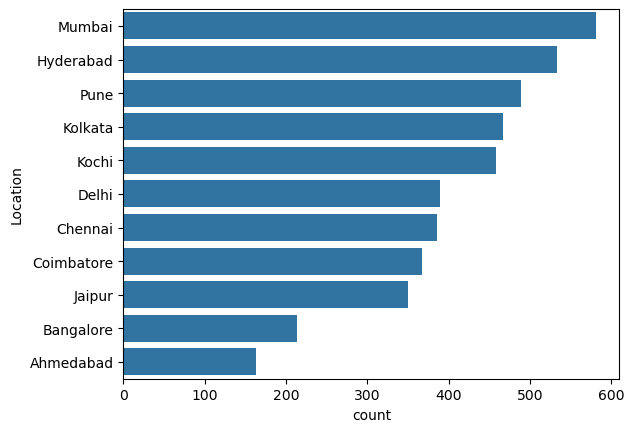

Fuel_Type


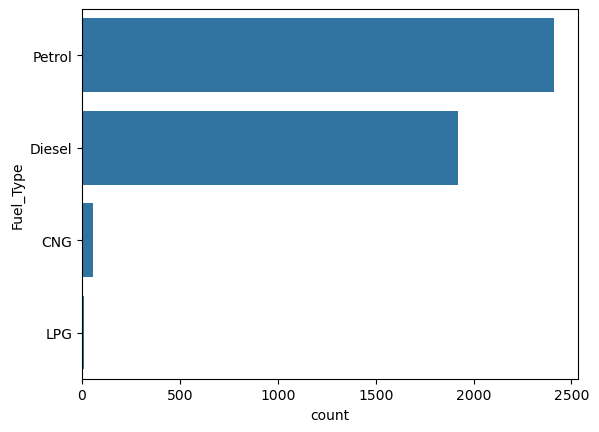

Transmission


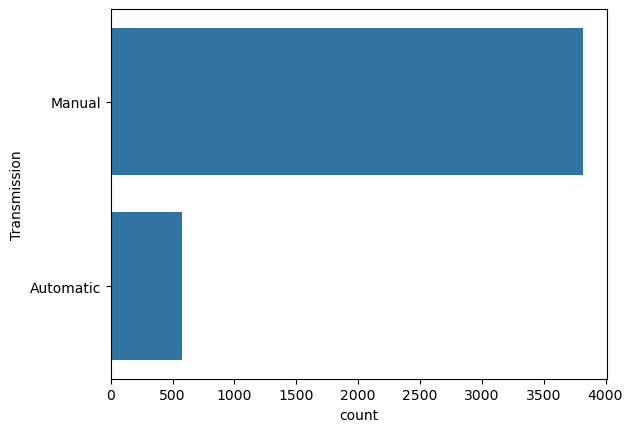

Owner_Type


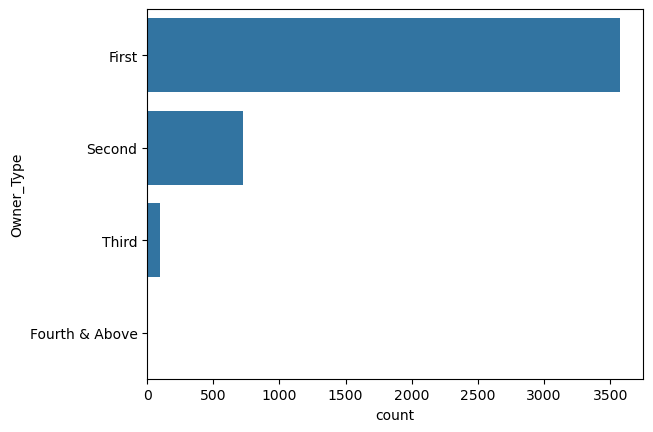

Seats


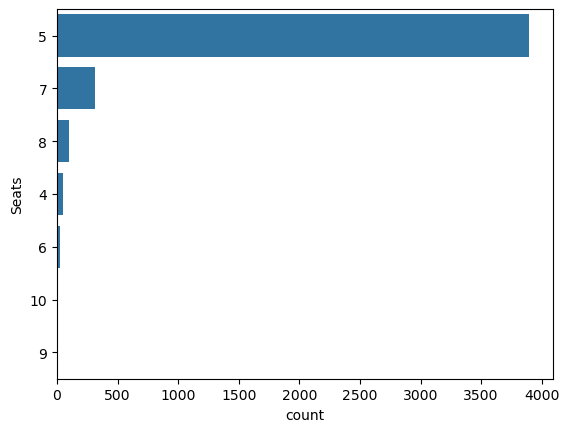

Brand


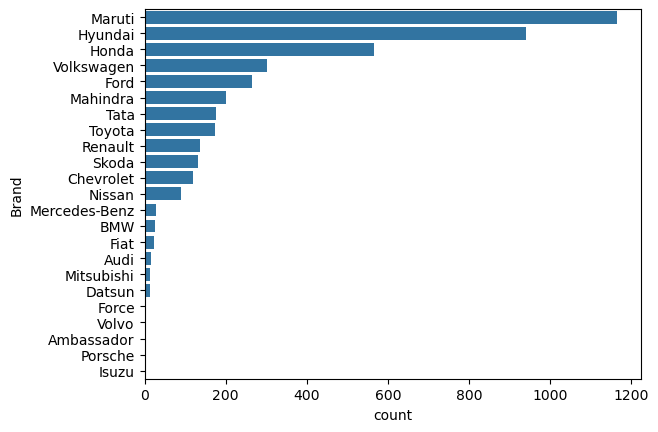

In [79]:
for col in cat_col:
    print(col)
    sns.countplot(budget_df[col], order=budget_df[col].value_counts().index)
    plt.show()

## Univariate Analysis: Budget Cars in the Used Car Market

- City-wise Distribution: Mumbai leads the used car market, followed by Hyderabad and Pune. Ahmedabad has the smallest market share among the analyzed cities.
- Fuel Type: Petrol and diesel vehicles dominate the market, while CNG and LPG cars represent a significantly smaller portion.
- Transmission: Manual transmission vehicles are predominant in the budget segment of the used car market.
- Ownership: The majority of vehicles are first-owner cars, indicating a preference for less-used options.
- Seating Capacity: Most budget cars are 5-seaters, with 7-seaters making up the next largest group.
- Brand Popularity: Maruti holds the largest market share, followed by Hyundai and Honda.

Kilometers_Driven


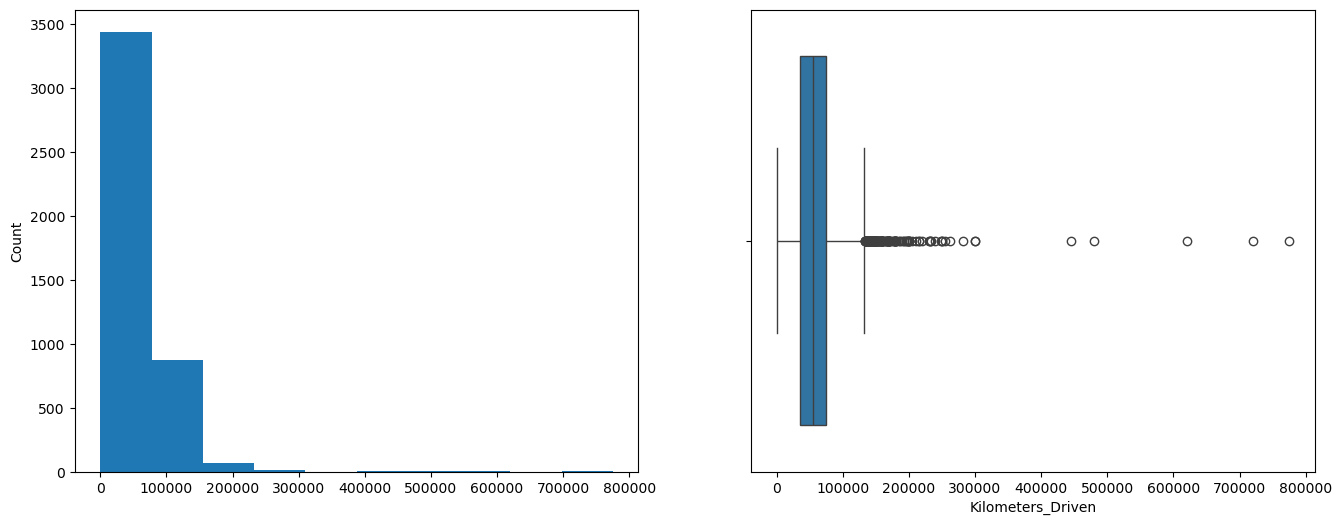

Mileage


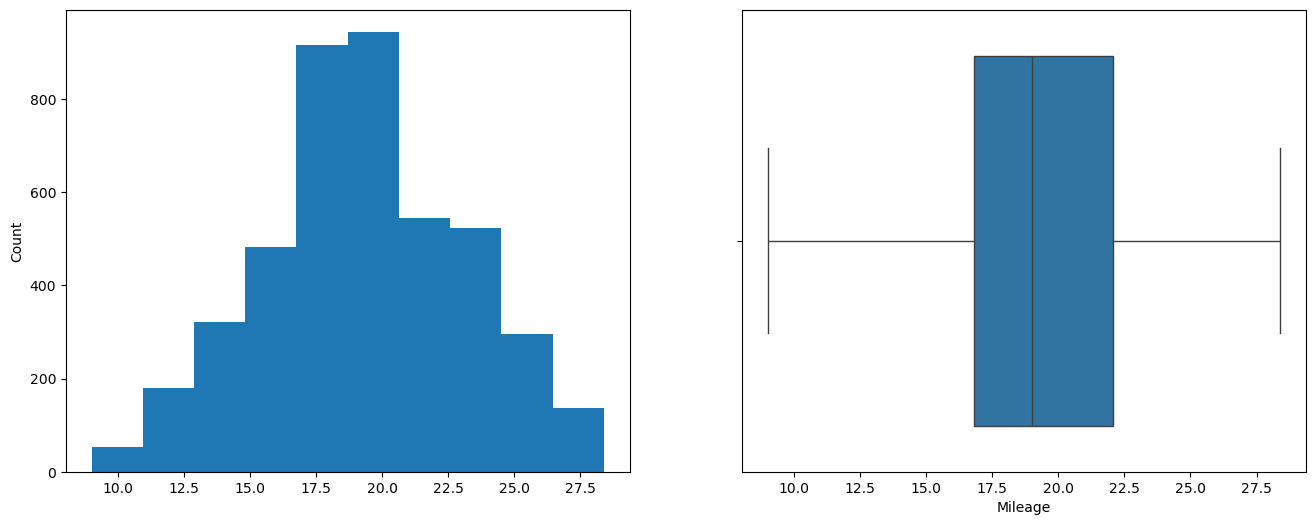

Engine


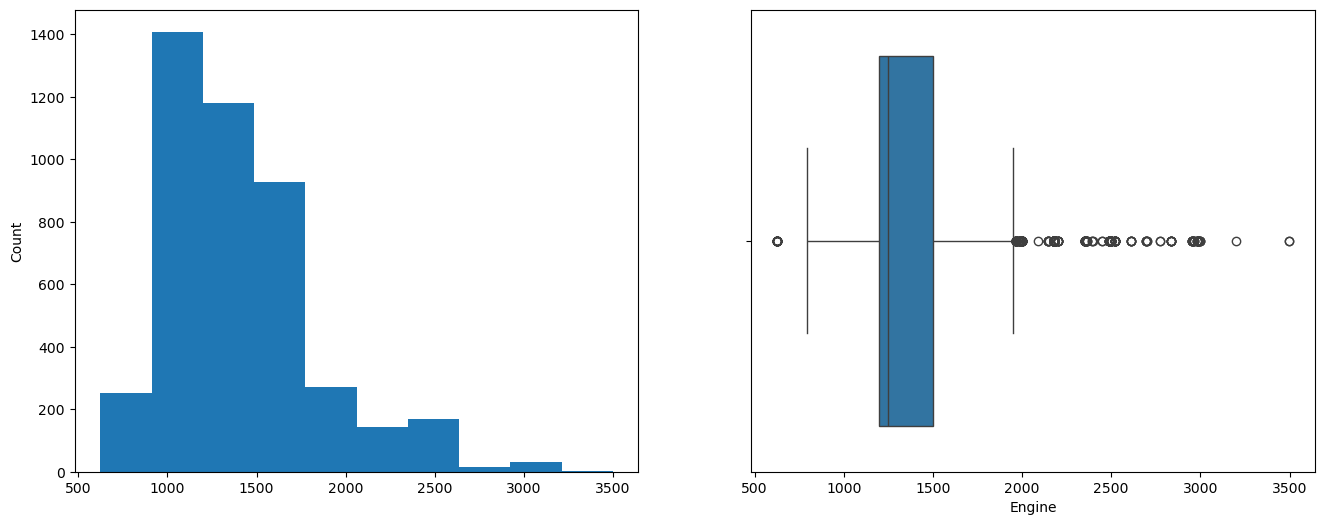

Power


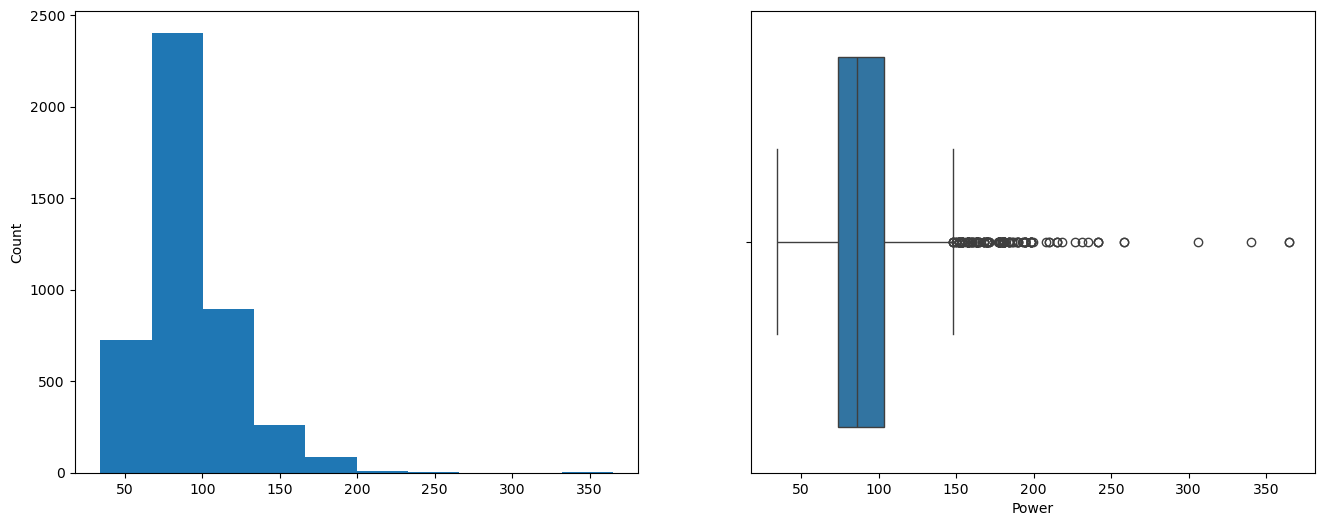

Price


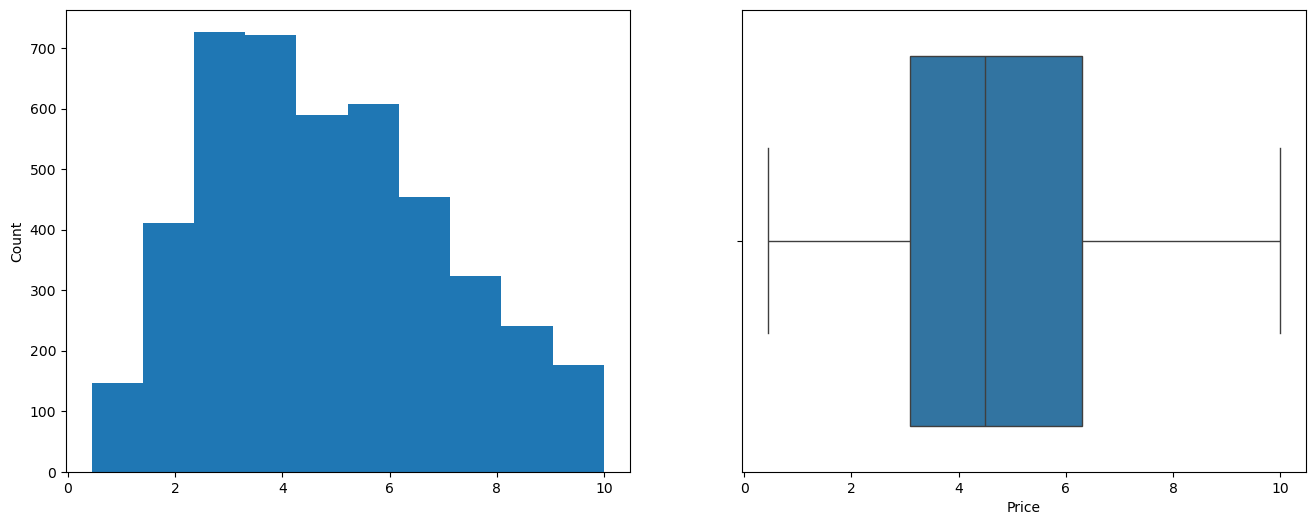

Car Age


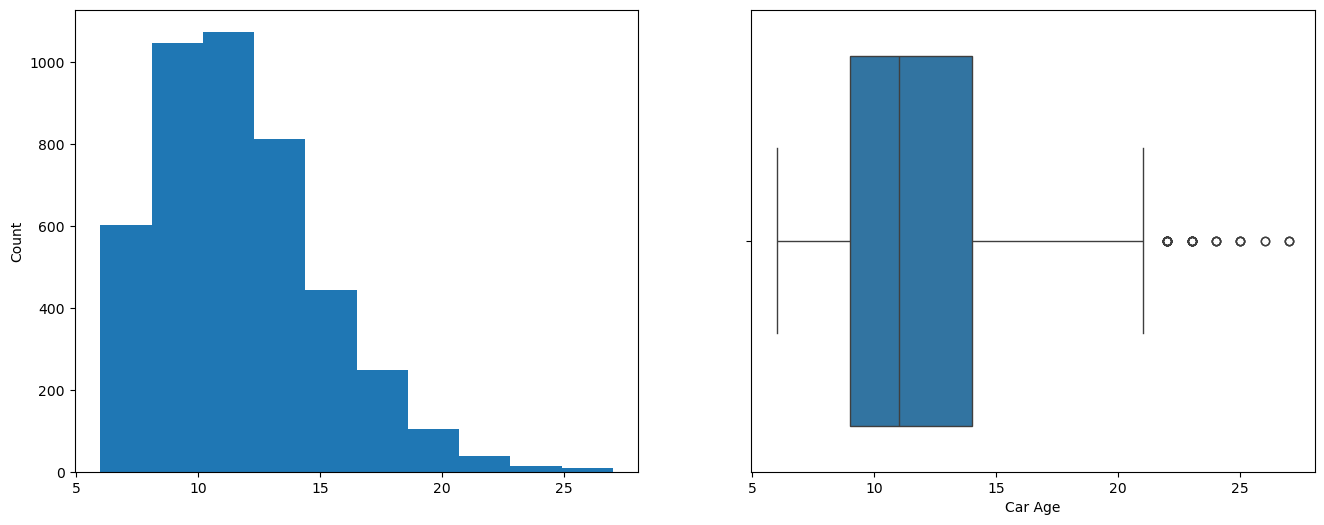

In [82]:
for col in numeric_col:
    print(col)
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    budget_df[col].hist(grid=False)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    sns.boxplot(x=budget_df[col])
    plt.show()

# Outliers Removal

In [85]:
for col in numeric_col:
    Q1 = budget_df[col].quantile(0.25)
    Q3 = budget_df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    budget_df = budget_df[(budget_df[col]>=lower_bound) & (budget_df[col]<= upper_bound)]

Kilometers_Driven


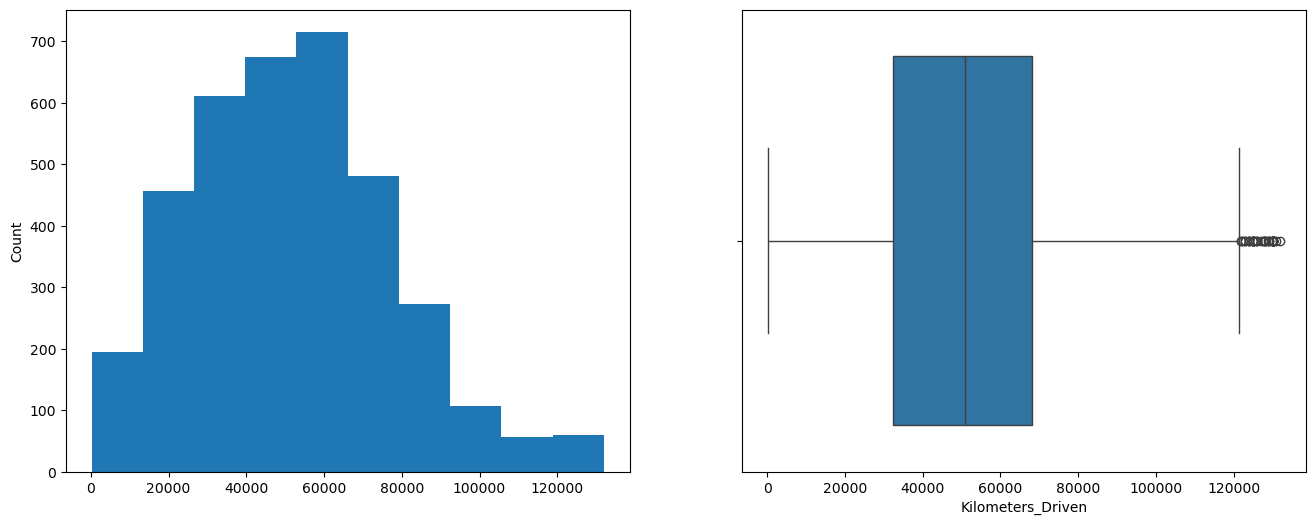

Mileage


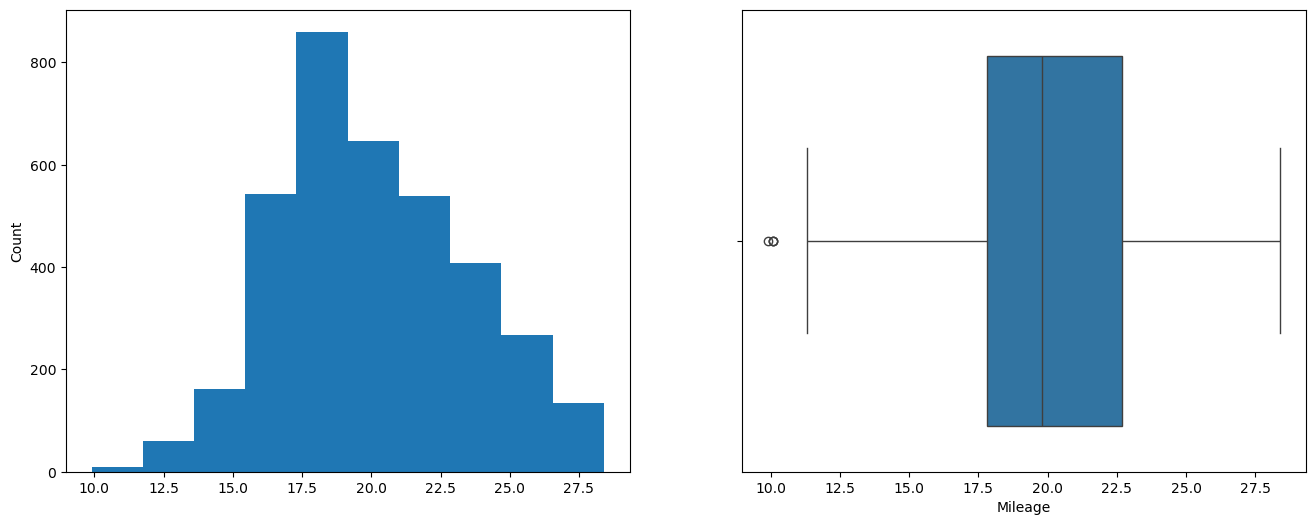

Engine


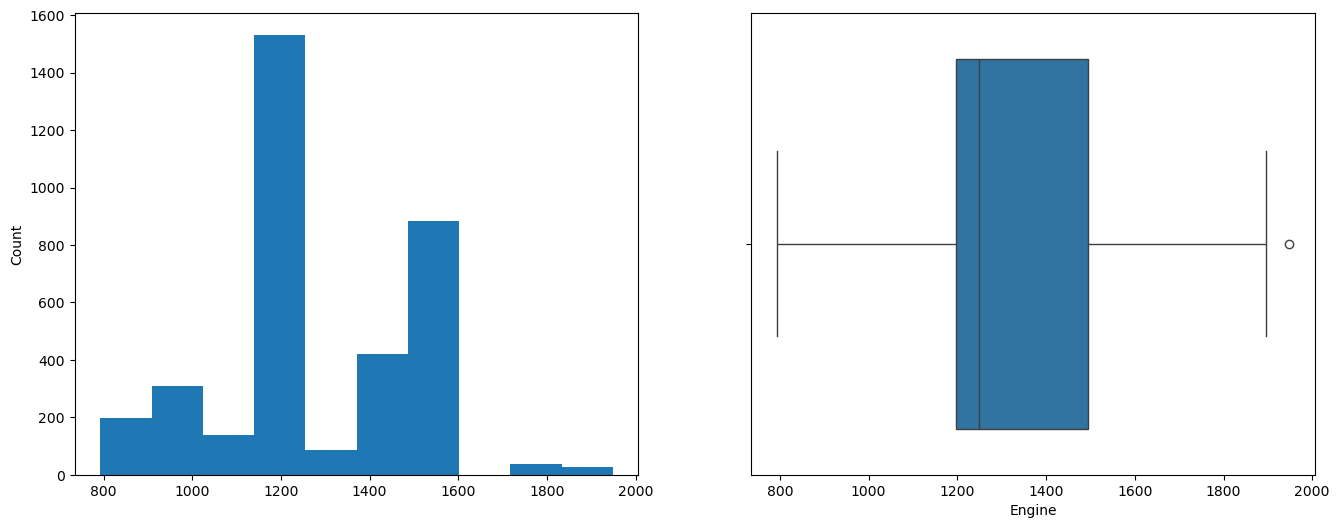

Power


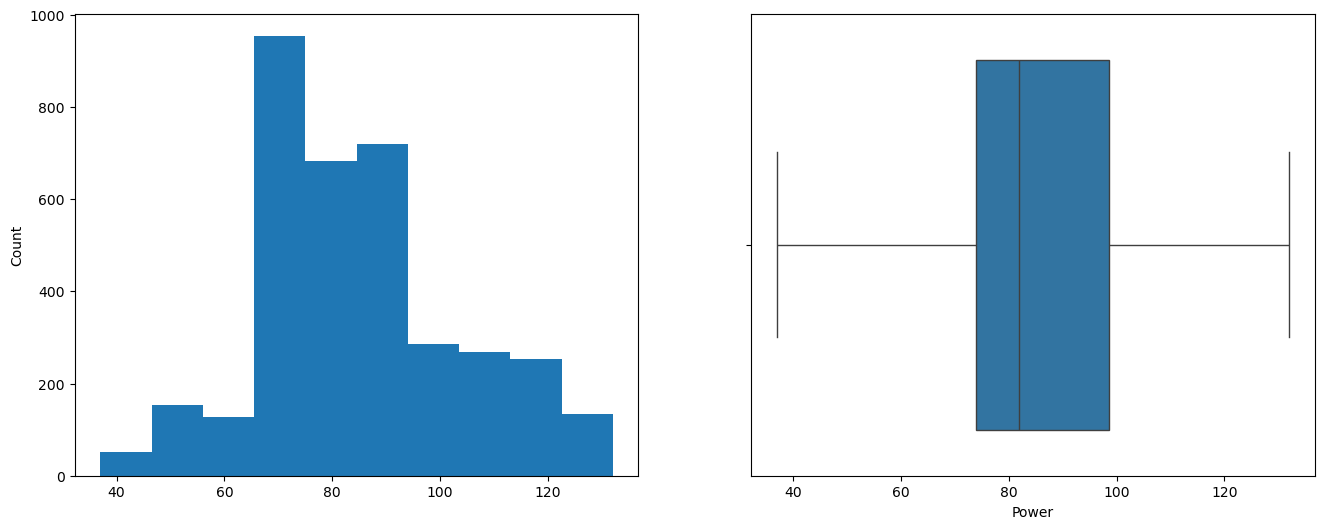

Price


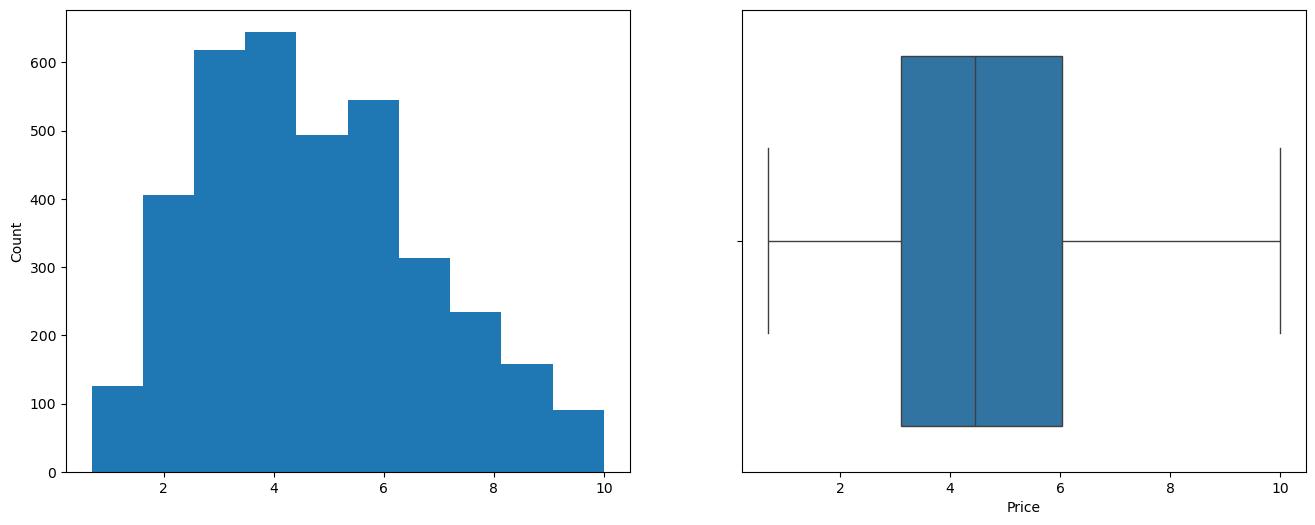

Car Age


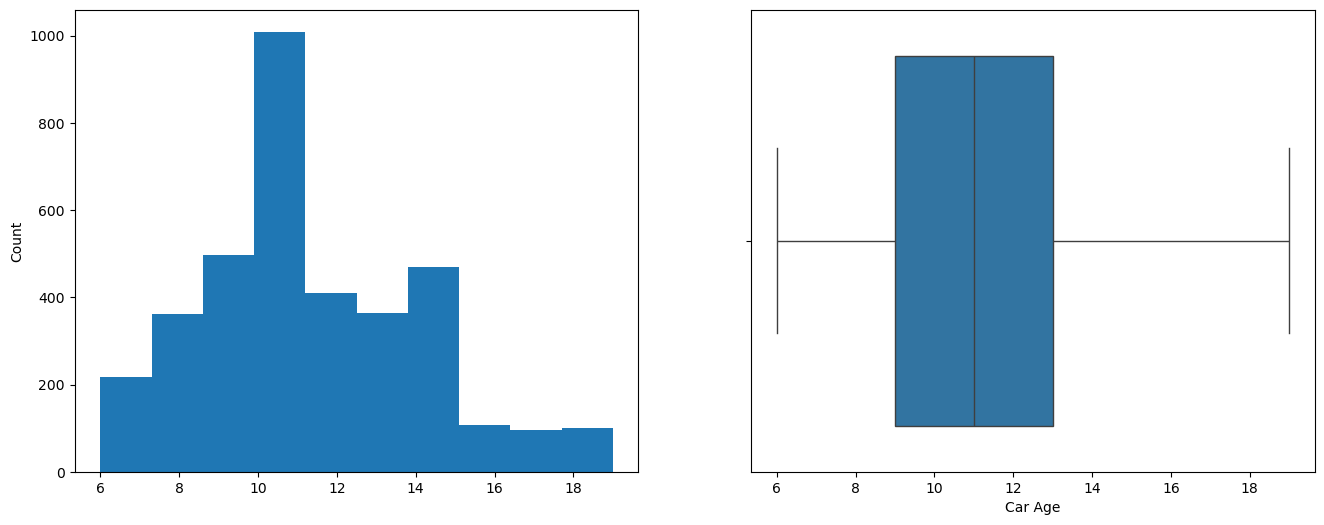

In [87]:
for col in numeric_col:
    print(col)
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    budget_df[col].hist(grid=False)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    sns.boxplot(x=budget_df[col])
    plt.show()

# Bivariate EDA

<Figure size 1200x800 with 0 Axes>

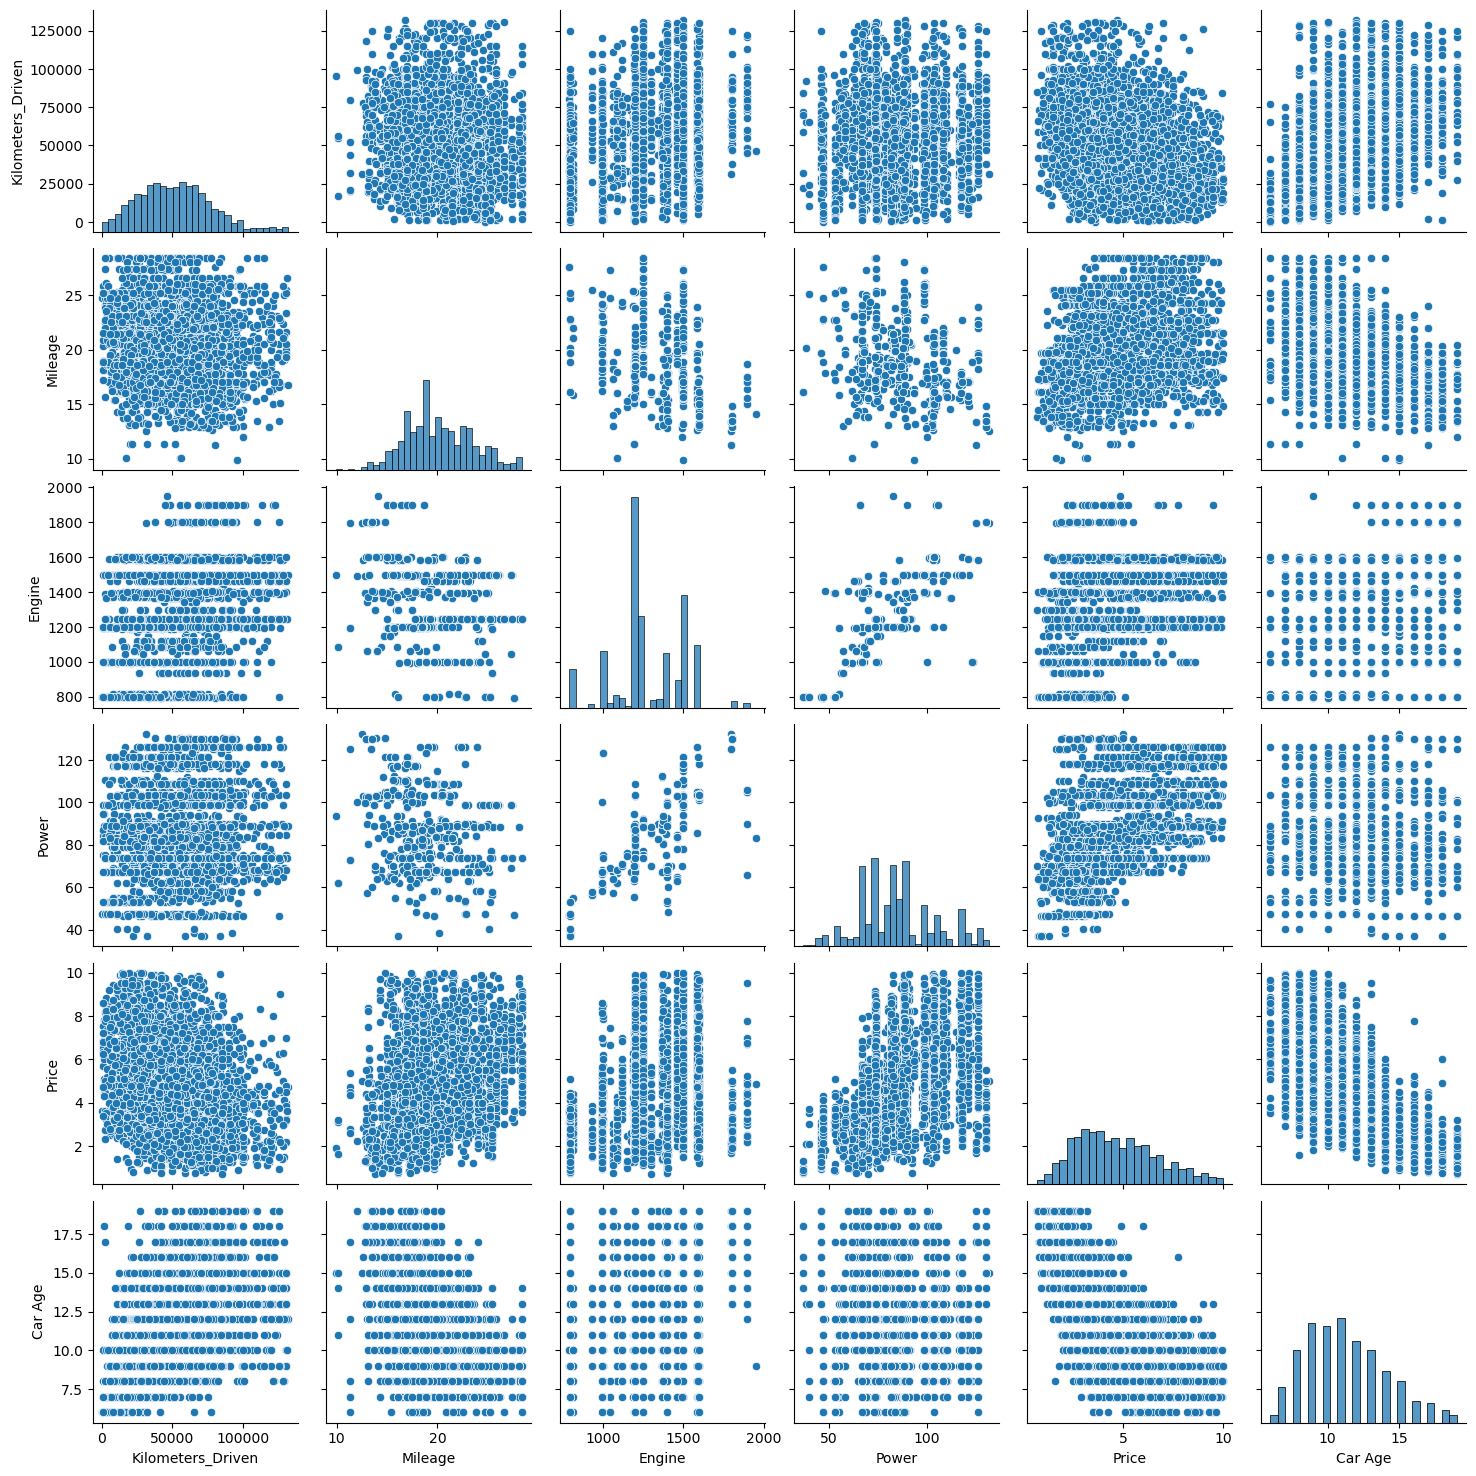

In [90]:
plt.figure(figsize=(12,8))
sns.pairplot(data = budget_df)
plt.show()

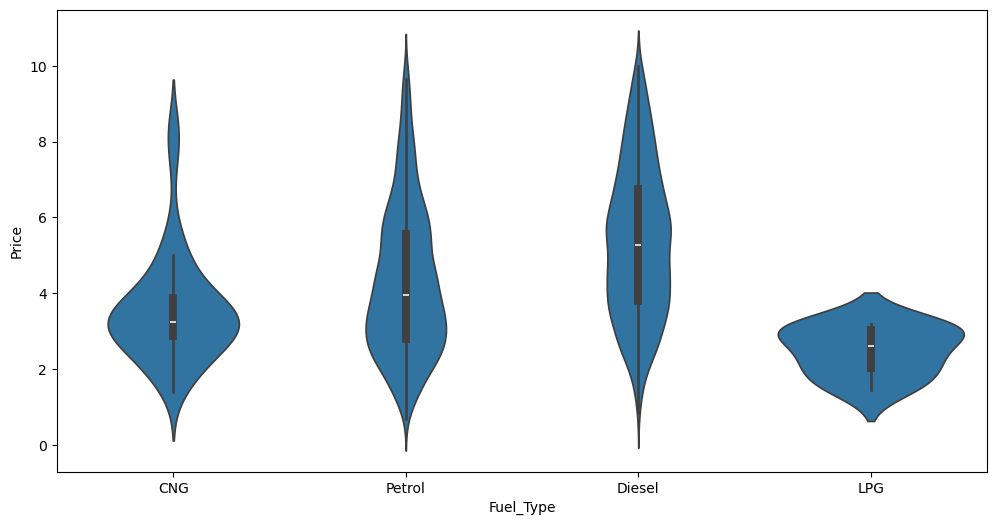

In [92]:
plt.figure(figsize=(12,6))
sns.violinplot(data=budget_df, y="Price", x="Fuel_Type")
plt.show()

# Multivariate EDA

In [95]:
numeric_col = budget_df.select_dtypes(include=["number"])
numeric_col

,Kilometers_Driven,Mileage,Engine,Power,Price,Car Age
0,72000,19.950,998,58.16,1.75,15
2,46000,18.200,1199,88.70,4.50,14
3,87000,20.770,1248,88.76,6.00,13
5,75000,15.825,814,55.20,2.35,13
6,86999,23.080,1461,63.10,3.50,12
...,...,...,...,...,...,...
5838,70602,25.800,1498,98.60,4.83,10
5839,27365,28.400,1248,74.00,4.75,11
5840,100000,24.400,1120,71.00,4.00,10
5842,46000,18.900,998,67.10,2.65,12


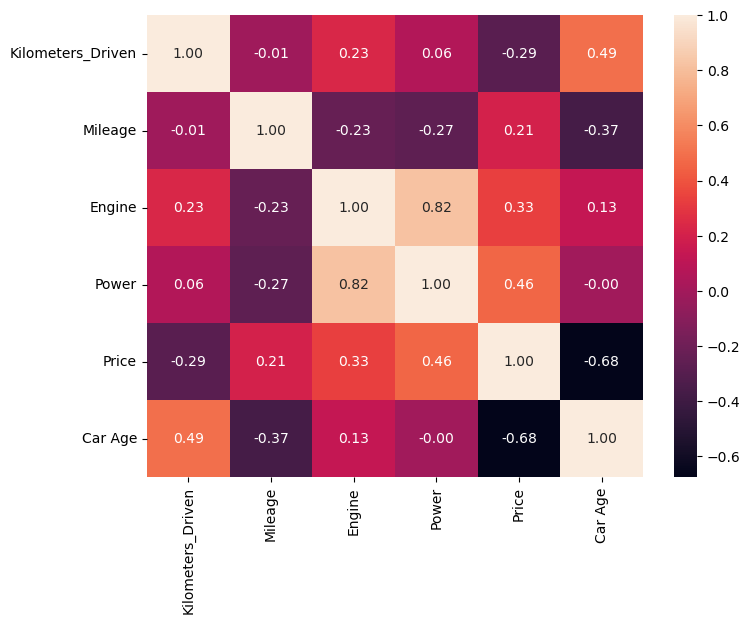

In [97]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_col.corr(), annot= True, fmt=".2f")
plt.show()

The correlation matrix indicates a perfect negative correlation between Car_Age and Price, demonstrating a strong inverse relationship— as the age of a vehicle increases, its market value correspondingly declines.

# Luxery Car Analysis

In [101]:
luxary_df = df[df["Price"] >10]

In [105]:
luxary_df

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car Age
1,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai,10
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi,12
7,Mumbai,36000,Diesel,Automatic,First,11.36,2755,171.50,8,17.50,Toyota,9
13,Delhi,72000,Diesel,Automatic,First,12.70,2179,187.70,5,27.00,Landrover,11
14,Delhi,110000,Diesel,Manual,First,13.50,2477,175.56,7,15.00,Mitsubishi,11
...,...,...,...,...,...,...,...,...,...,...,...,...
5822,Kochi,31150,Diesel,Automatic,First,16.36,2179,187.70,5,30.54,Jaguar,9
5827,Kochi,91903,Diesel,Automatic,First,17.68,1968,174.33,5,17.56,Audi,12
5832,Mumbai,102002,Diesel,Automatic,First,8.70,2987,224.34,5,10.75,Mercedes-Benz,16
5834,Hyderabad,40000,Diesel,Automatic,Second,17.85,2967,300.00,4,45.00,Porsche,12


In [107]:
luxary_df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car Age
1,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai,10
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi,12
7,Mumbai,36000,Diesel,Automatic,First,11.36,2755,171.50,8,17.50,Toyota,9
13,Delhi,72000,Diesel,Automatic,First,12.70,2179,187.70,5,27.00,Landrover,11
14,Delhi,110000,Diesel,Manual,First,13.50,2477,175.56,7,15.00,Mitsubishi,11


In [109]:
luxary_df.describe()

,Kilometers_Driven,Mileage,Engine,Power,Price,Car Age
count,1.448000e+03,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000
mean,5.651736e+04,15.369800,2302.858425,179.490497,23.894081,10.369475
std,1.726807e+05,3.384346,590.248106,56.836710,14.726358,2.524152
min,1.000000e+03,6.400000,1248.000000,87.200000,10.050000,6.000000
25%,2.988925e+04,12.800000,1968.000000,140.800000,13.500000,8.000000
50%,4.700000e+04,15.000000,2143.000000,174.330000,19.000000,10.000000
75%,6.710375e+04,17.680000,2755.000000,191.340000,29.500000,12.000000
max,6.500000e+06,27.030000,5998.000000,560.000000,160.000000,19.000000


In [111]:
cat_col1 = luxary_df.select_dtypes(include=["object"]).columns.tolist()
cat_col1

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand']

In [113]:
num_col1 = luxary_df.select_dtypes(include=["number"]).columns.tolist()
num_col1

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Car Age']

Kilometers_Driven


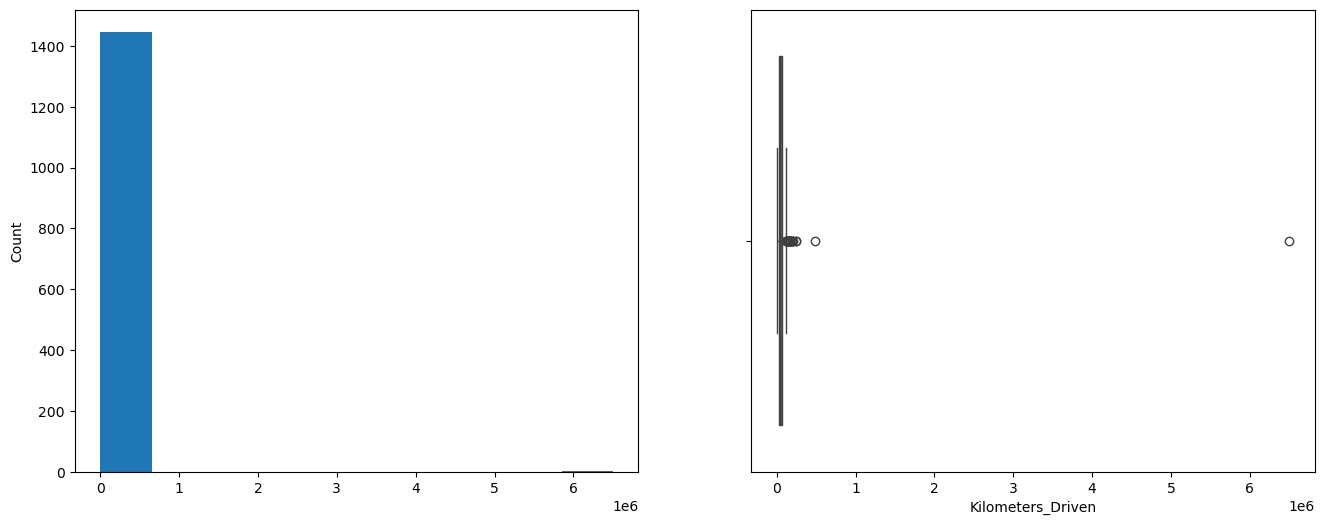

Mileage


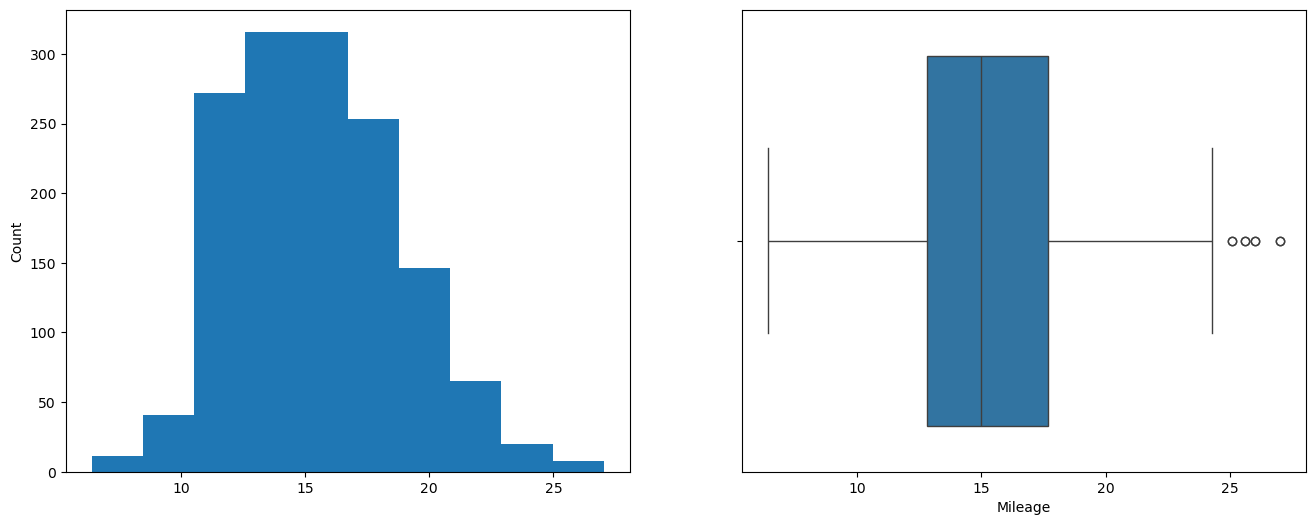

Engine


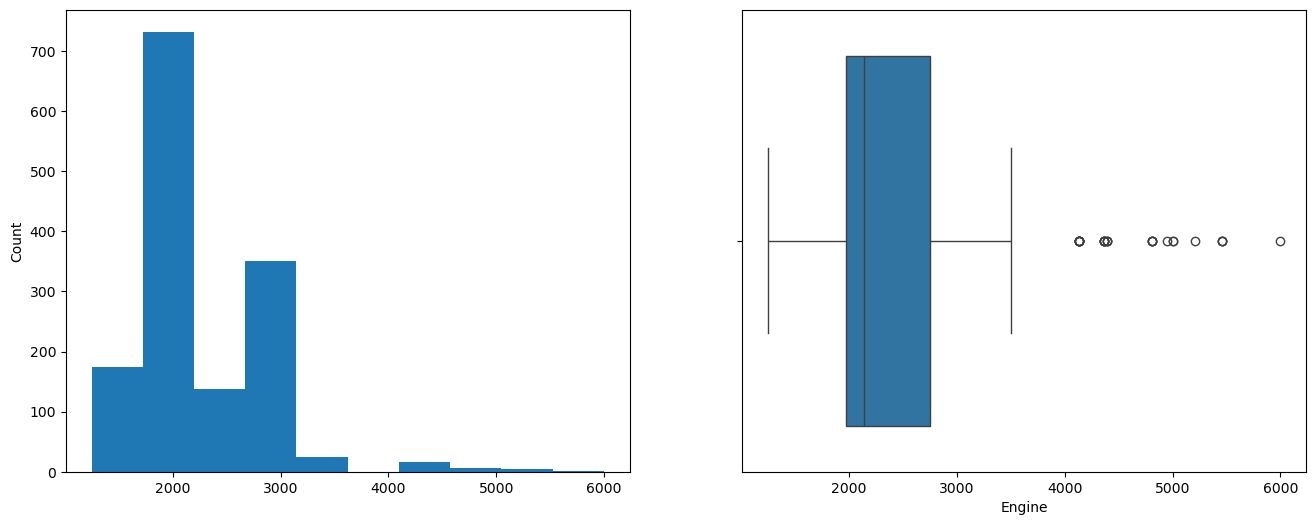

Power


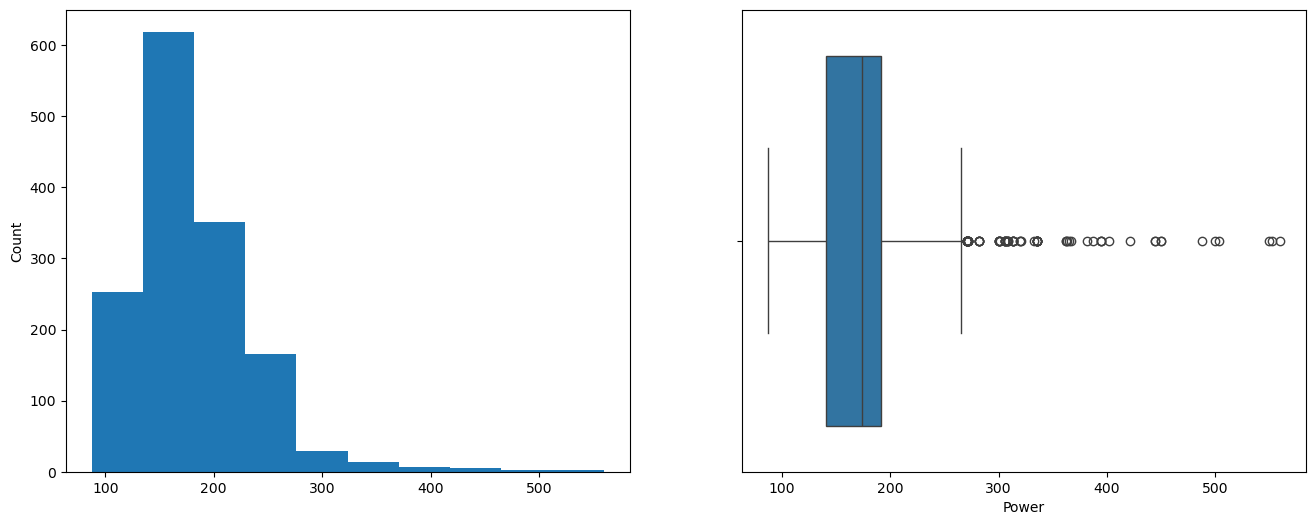

Price


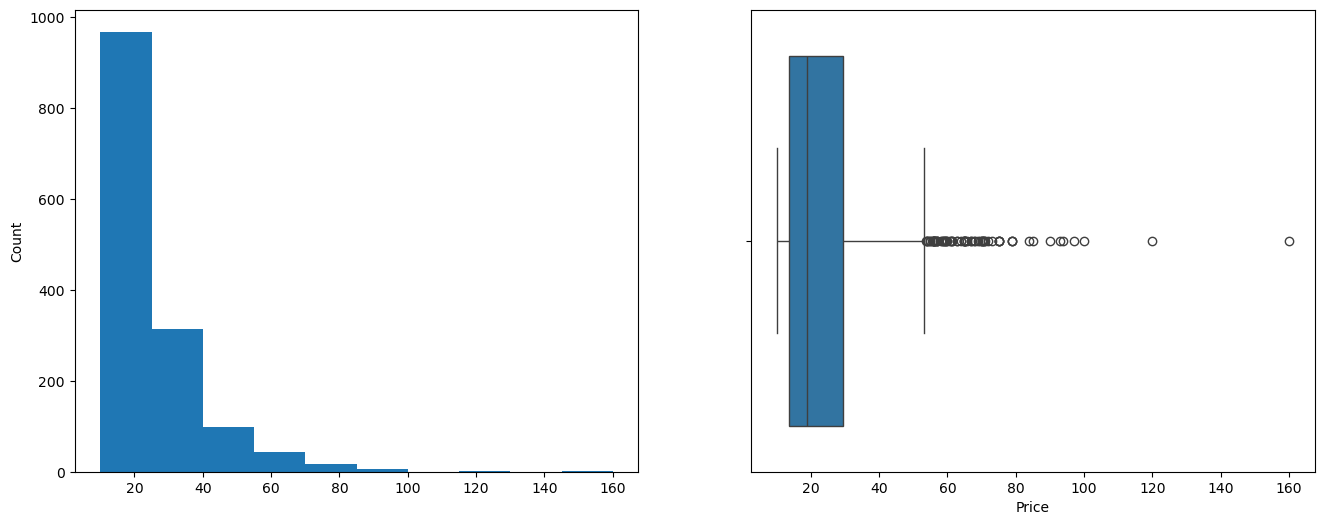

Car Age


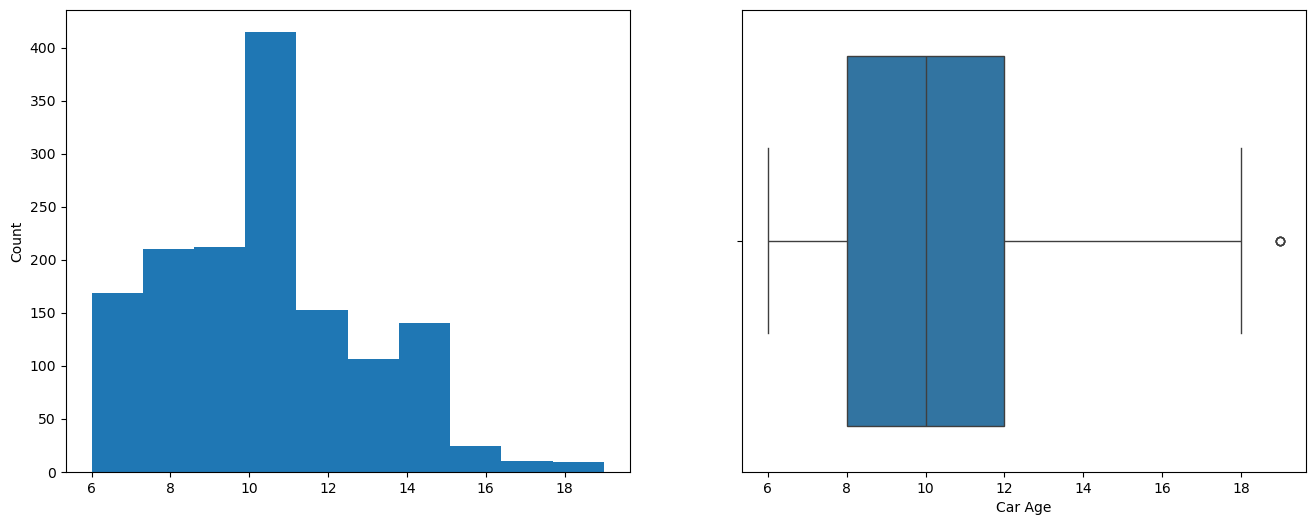

In [115]:
for col in num_col1:
    print(col)
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    luxary_df[col].hist(grid=False)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    sns.boxplot(x=luxary_df[col])
    plt.show()

In [117]:
#removing outliers
for col in num_col1:
    Q1= luxary_df[col].quantile(0.25)
    Q3= luxary_df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    luxary_df = luxary_df[(luxary_df[col]>=lower_bound)&(luxary_df[col]<= upper_bound)]

Kilometers_Driven


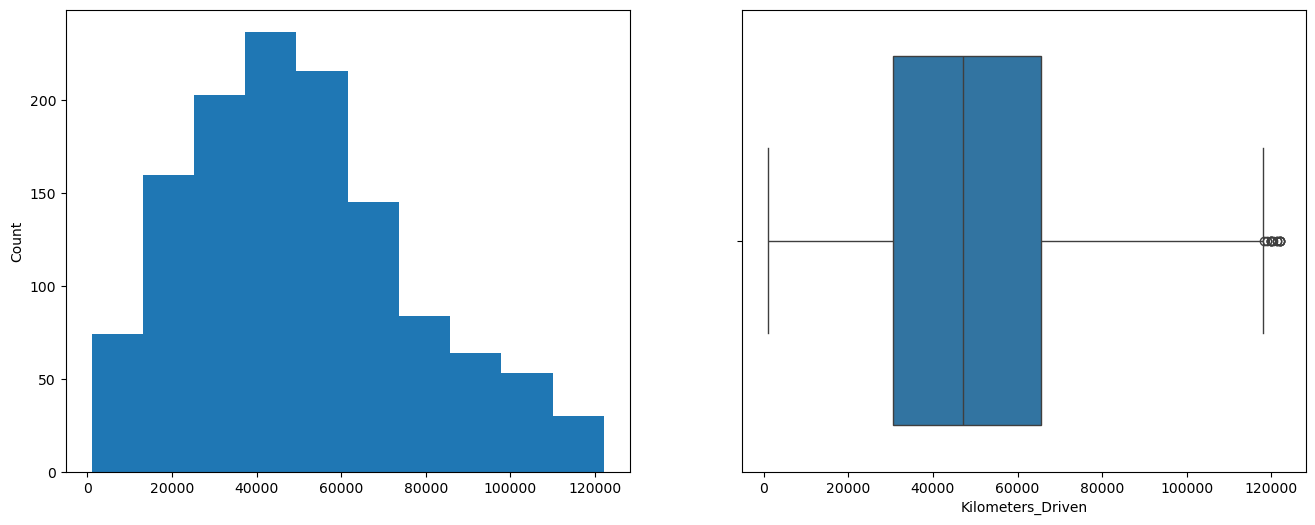

Mileage


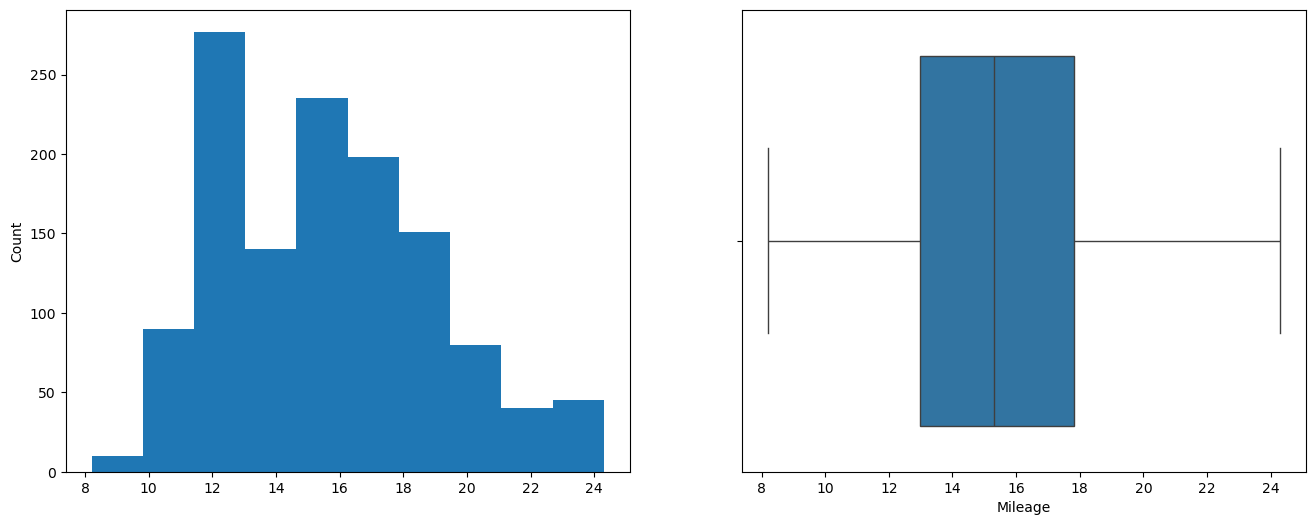

Engine


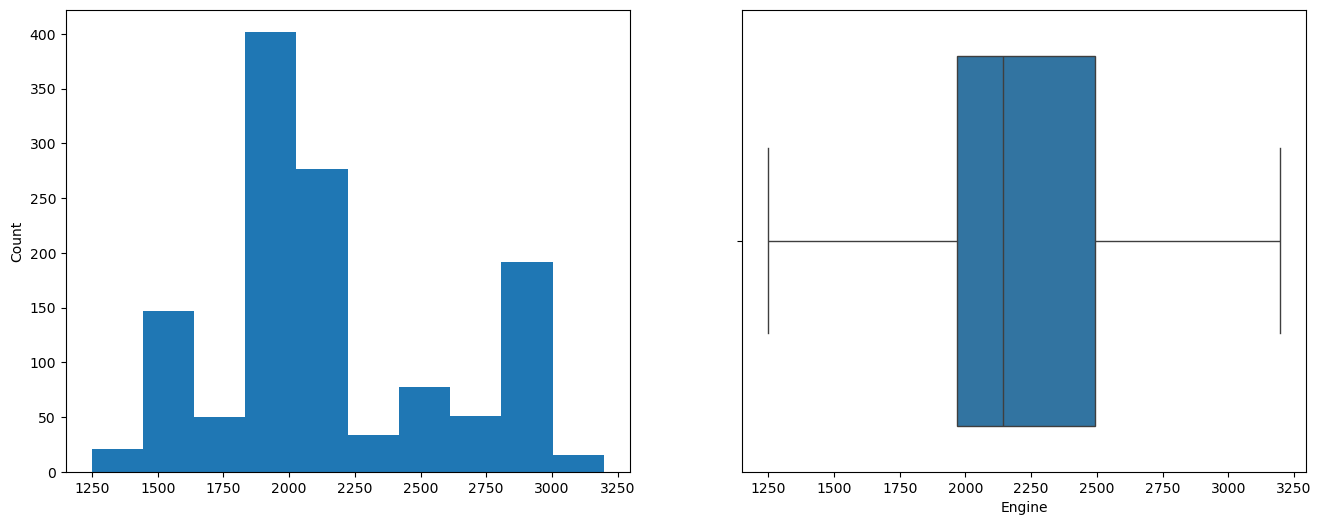

Power


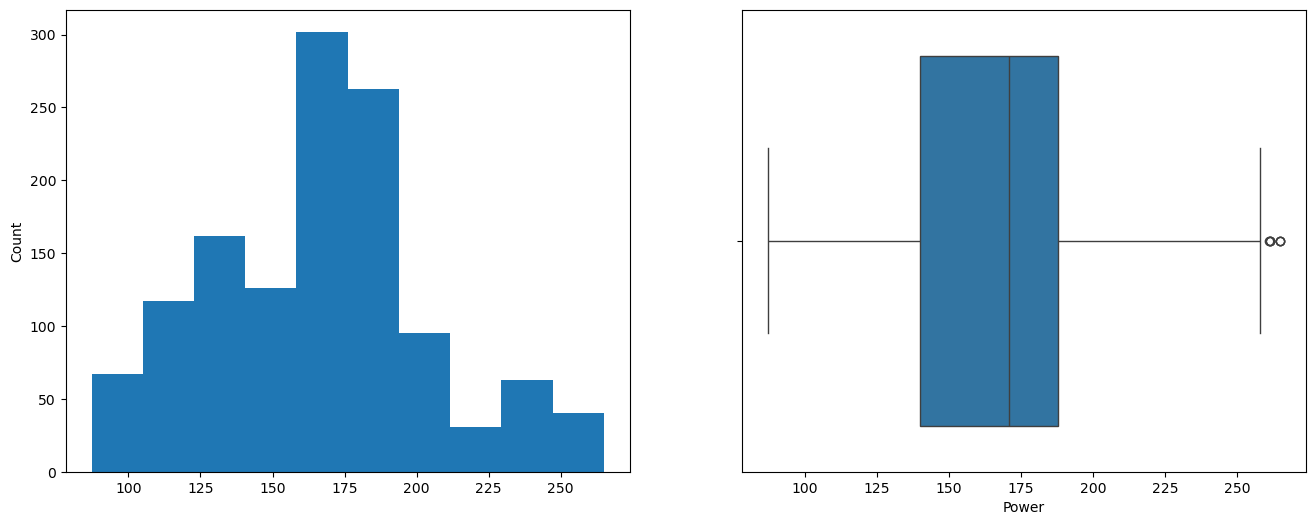

Price


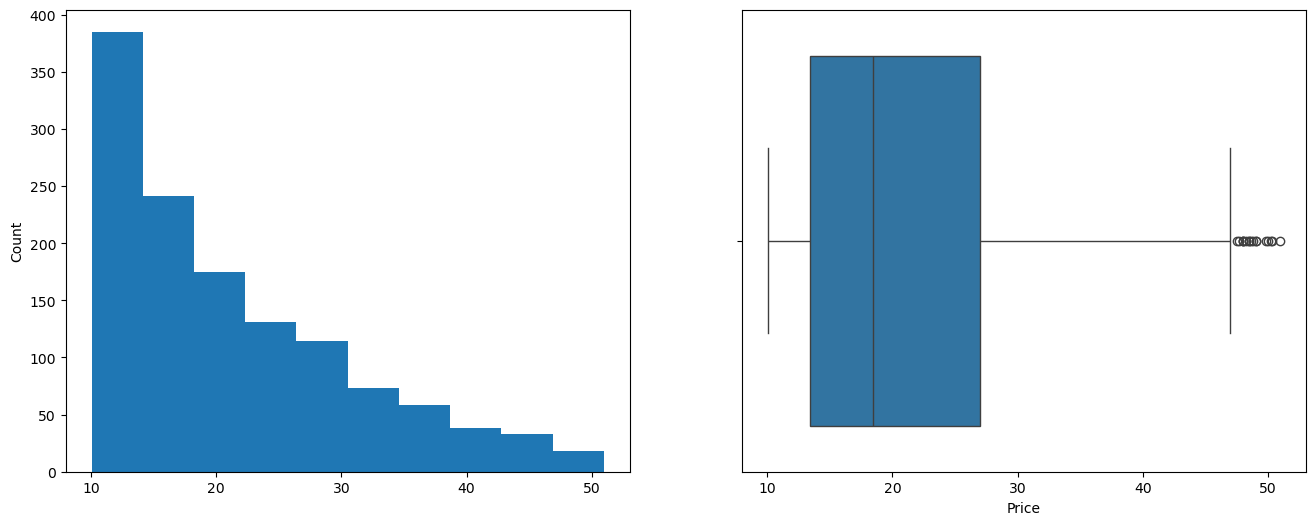

Car Age


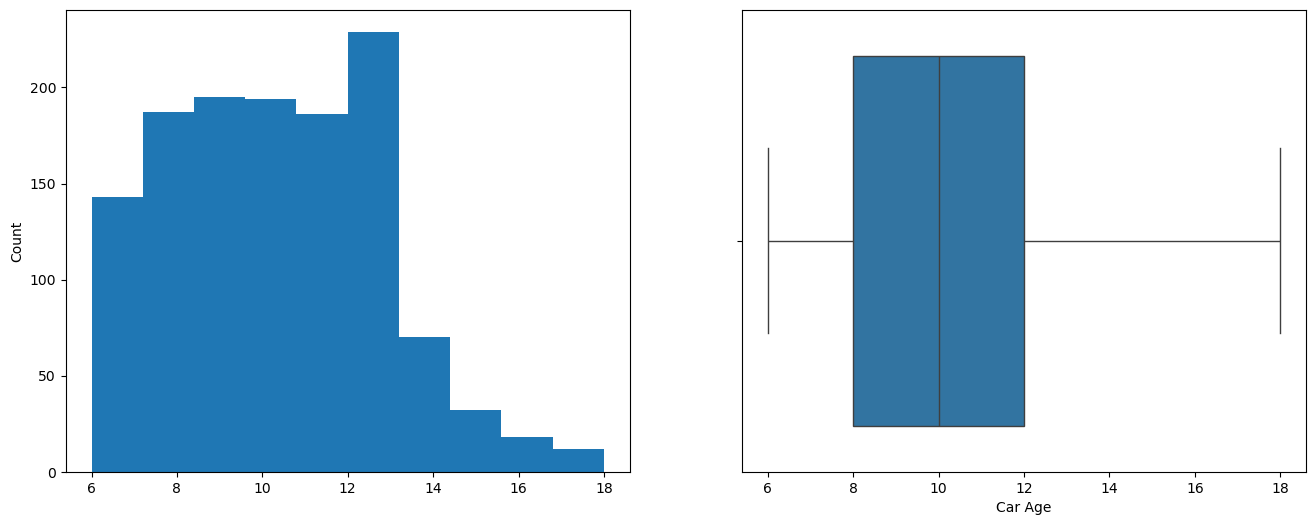

In [119]:
for col in num_col1:
    print(col)
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    luxary_df[col].hist(grid=False)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    sns.boxplot(x=luxary_df[col])
    plt.show()

Location


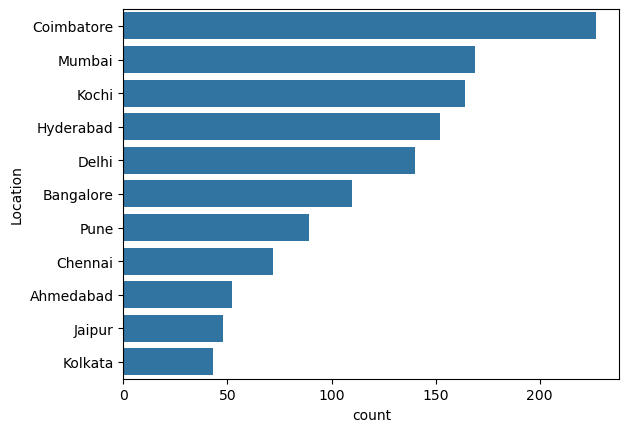

Fuel_Type


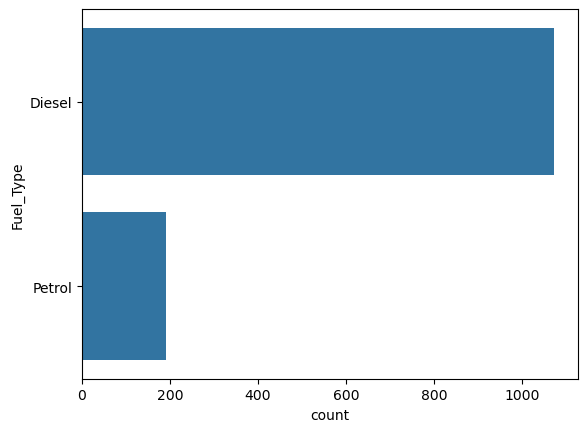

Transmission


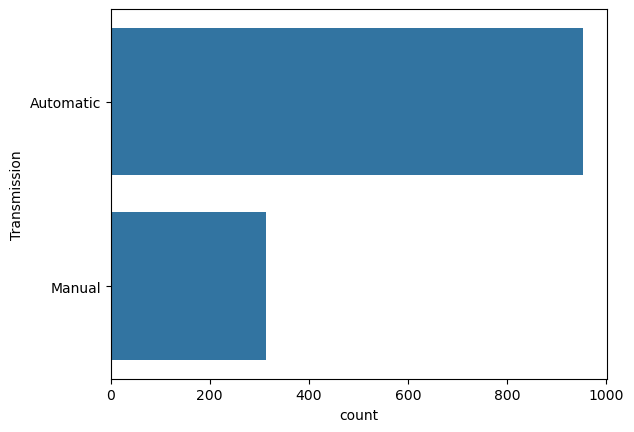

Owner_Type


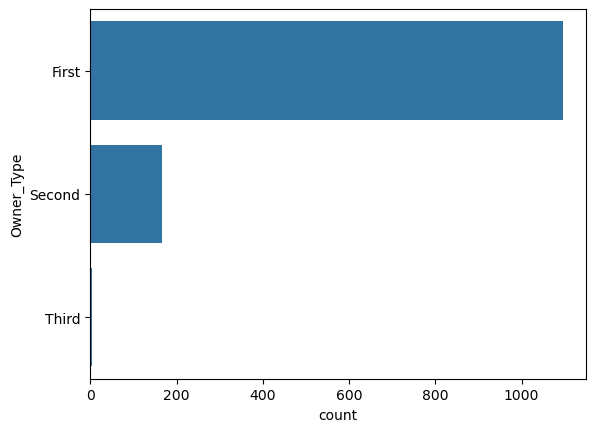

Seats


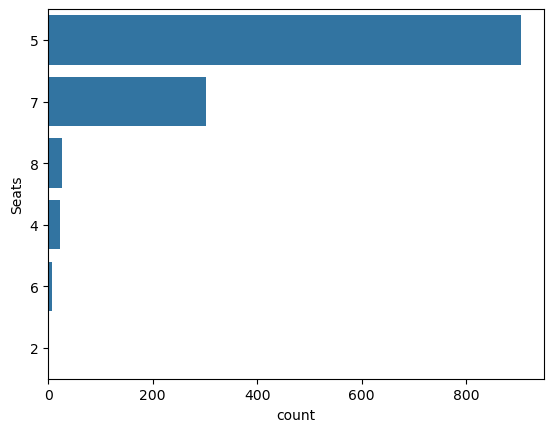

Brand


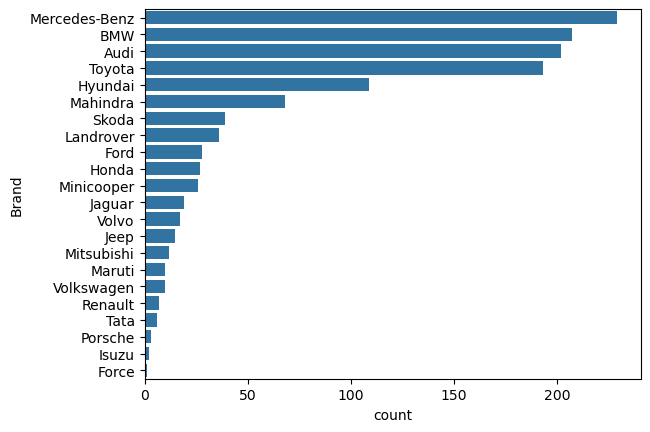

In [121]:
for col in cat_col1:
    print(col)
    sns.countplot(luxary_df[col], order=luxary_df[col].value_counts().index)
    plt.show()

## Univariate Analysis: Luxary Cars in the Used Car Market
- Geographical Sales Distribution: Coimbatore demonstrates the highest sales volume for luxury cars, with Mumbai and Kochi following as the second and third strongest markets, respectively.
- Fuel Type Preference: Diesel luxury cars significantly outsell their petrol counterparts in the market.
- Transmission Type Value: Automatic transmission luxury vehicles command a higher value compared to manual driving cars.
- Ownership History Impact: Second-hand luxury cars show higher sales figures when compared to third-hand vehicles.
- Seating Capacity Preference: Five-seater luxury cars exhibit greater sales value than seven-seater models.
- Brand Performance in Used Market: Mercedes-Benz leads in used luxury car sales, followed by BMW, Audi and Toyota, indicating strong brand presence and demand in the pre-owned market for these manufacturers.

<Figure size 1200x800 with 0 Axes>

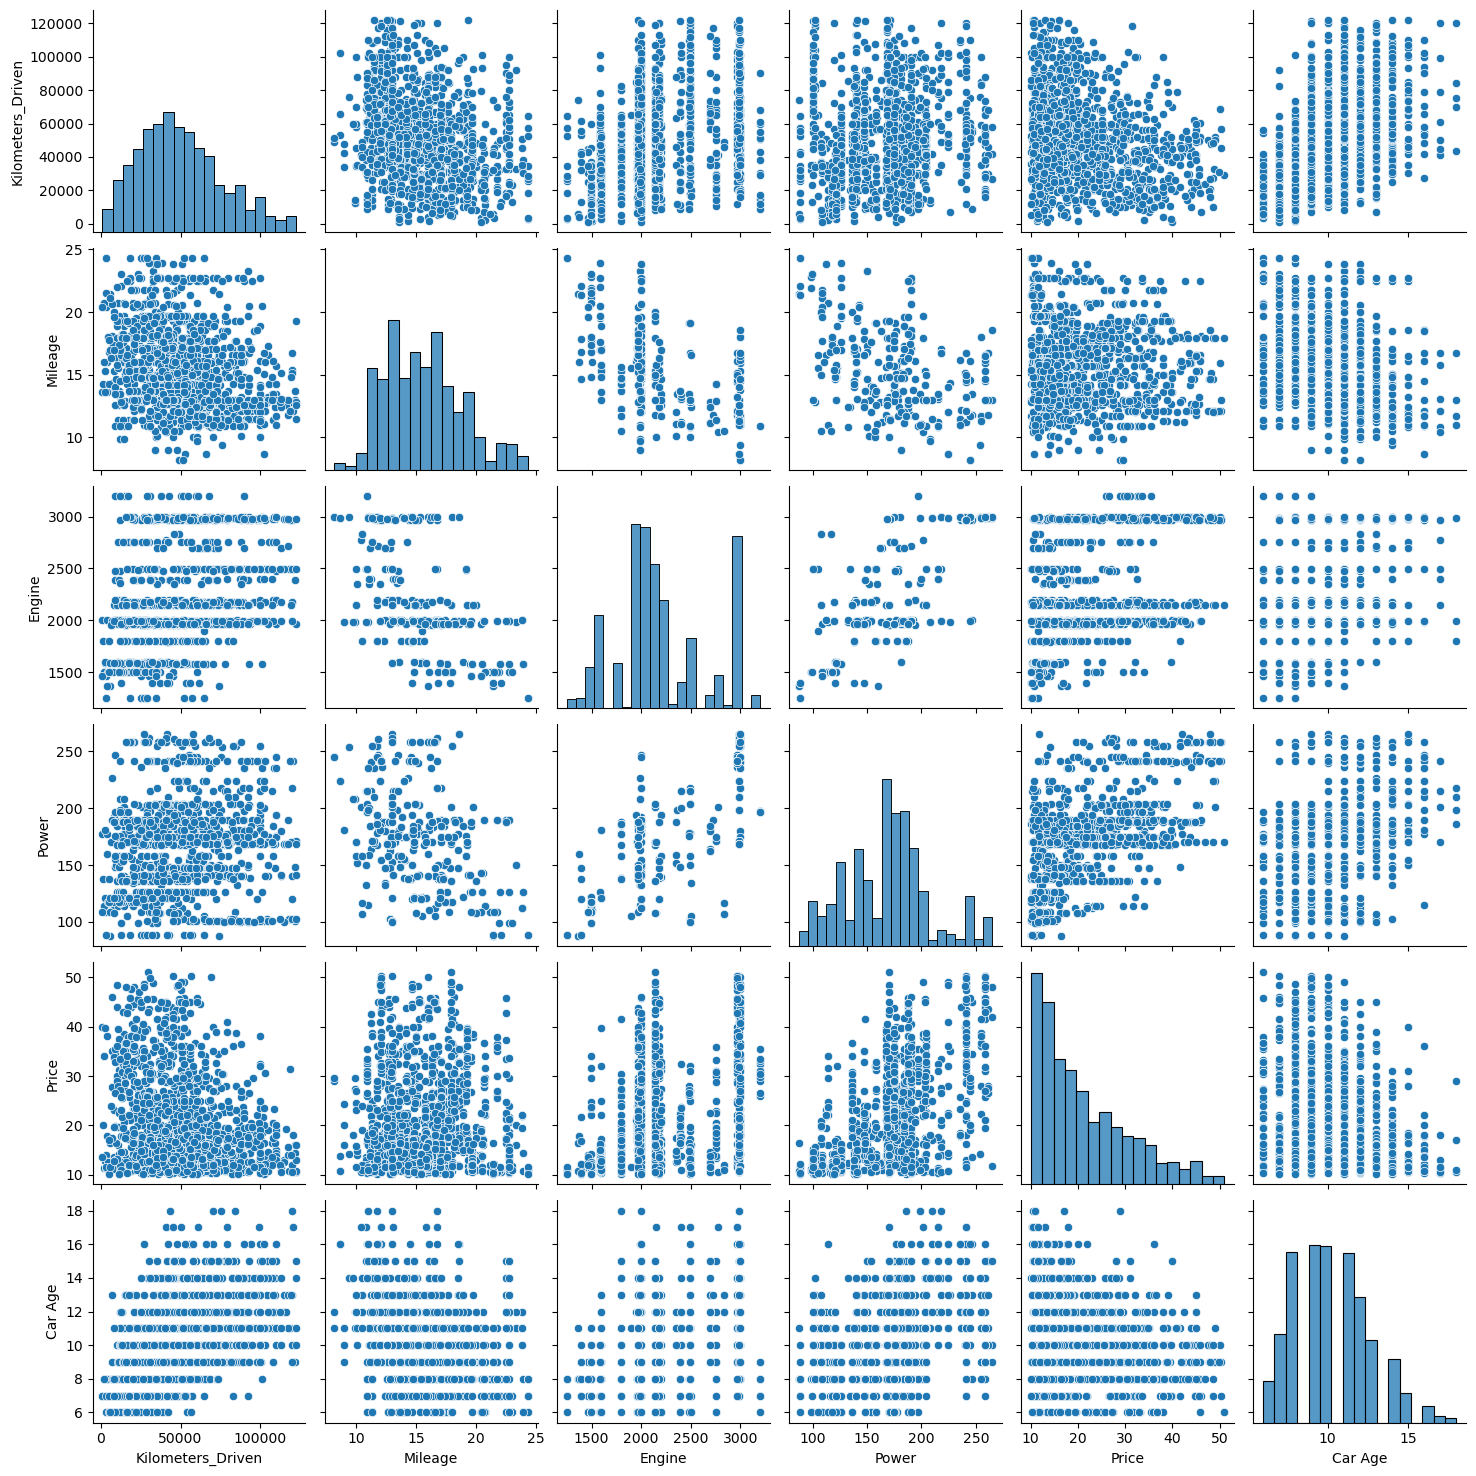

In [129]:
plt.figure(figsize=(12,8))
sns.pairplot(data = luxary_df)
plt.show() 

In [131]:
numeric_col1 = luxary_df.select_dtypes(include=["number"])
numeric_col1

,Kilometers_Driven,Mileage,Engine,Power,Price,Car Age
1,41000,19.67,1582,126.20,12.50,10
4,40670,15.20,1968,140.80,17.74,12
7,36000,11.36,2755,171.50,17.50,9
13,72000,12.70,2179,187.70,27.00,11
14,110000,13.50,2477,175.56,15.00,11
...,...,...,...,...,...,...
5815,58629,18.25,1968,187.74,16.52,12
5822,31150,16.36,2179,187.70,30.54,9
5827,91903,17.68,1968,174.33,17.56,12
5832,102002,8.70,2987,224.34,10.75,16


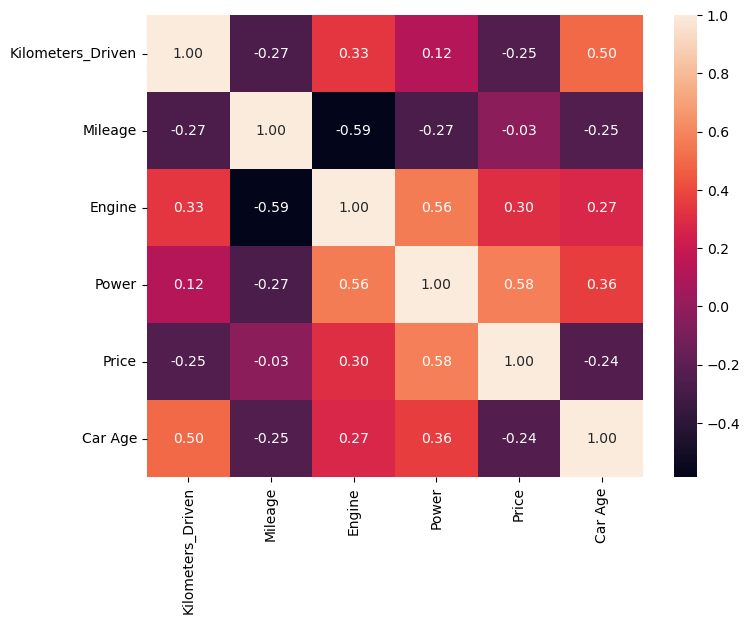

In [133]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_col1.corr(), annot= True, fmt=".2f")
plt.show()

The correlation matrix also reveals a negative correlation between Engine size and Mileage, suggesting that vehicles with larger engines tend to have lower fuel efficiency.